In [117]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [118]:
import warnings
warnings.simplefilter(action = "ignore") 

# Evaluation Metrics of Classification Problems

* Accuracy, precision, Recall, F1, Confusion Matrix :

Link1:
https://medium.com/@gulcanogundur/do%C4%9Fruluk-accuracy-kesinlik-precision-duyarl%C4%B1l%C4%B1k-recall-ya-da-f1-score-300c925feb38

Link2: https://medium.com/data-science-tr/s%C4%B1n%C4%B1fland%C4%B1rma-modellerinde-ba%C5%9Far%C4%B1-kriterleri-2d86488799c6

* ROC-AUC (receiver operating characteristic curve - Area Under Curve): 

Link1: https://www.youtube.com/watch?v=4jRBRDbJemM

Link2: https://medium.com/@gulcanogundur/roc-ve-auc-1fefcfc71a14


# PROJE 4: Şeker Hastalığı Tahmini

In [119]:
df = pd.read_csv("./diabetes.csv")

In [120]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
df.shape

(768, 9)

In [122]:
# Data seti hakkında genel bilgi verir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
# y bağımlı değişkenindeki sınıfların yüzdesi
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [124]:
# Betimleyici (descriptive) istatistiksel analiz
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


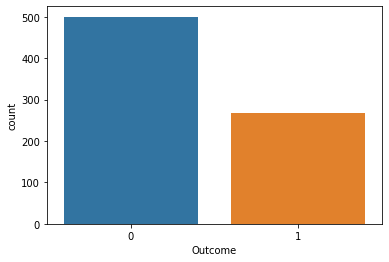

In [125]:
# Outcome  bağımlı değişkenindeki sınıf sayılarının görselleştirilmesi
sns.countplot(x = 'Outcome', data = df);


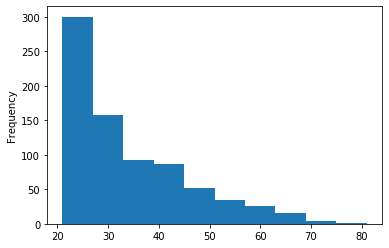

In [126]:
# Age değişkeninin dağılımı
df["Age"].plot.hist()

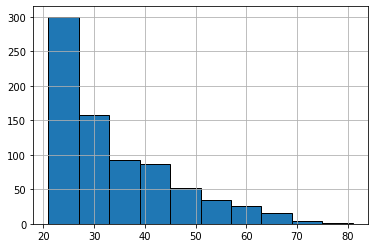

In [127]:
# Age değişkeninin dağılımı
df["Age"].hist(edgecolor = "black");

In [128]:
# Pregnancies değişkeninin Outcome' daki sınıflara göre ortalama değerleri
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [129]:
# Değişkenler arasındaki korellasyon(ilişki) değerlerini verir.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


* 0,   anlamlı korelasyon yok demek

* -1,  negatif yonlu korelasyon var demek. birisi artarken digeri azalır.

*  1,  pozitif yonlu korelasyon var demek. birisi artarken digeri de artar


# Data Preprocessing

In [130]:
#1.rastgele eksik degerler olustur. gercek degerleri sakla.
#2.olasi tum yontemleri deneyerek eksik olarak sakladigim indexleri doldur.
#3. MSE

In [131]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [132]:
# IQR' a göre aykırı değer analizi
for feature in df:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    #print('upper limit: ', lower)
    #print('upper limit: ', upper)
    #print(df[(df[feature] > upper)])
    
    if (df[feature] > upper).any():
        print(feature,"yes")
    else:
        print(feature, "no")
    
    """
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")
    
    """
    

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [133]:
Q1 = df["Insulin"].quantile(0.05)
Q3 = df["Insulin"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

In [134]:
upper

732.5

In [135]:
df[df["Insulin"] > upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0


In [136]:
df[df["Insulin"] > upper]["Insulin"]

13     846
228    744
Name: Insulin, dtype: int64

In [137]:
# I. Yol
# Insülin değişkeninde upper değerinden büyük olan aykırı değerleri al ve upper değerine eşitle
df["Insulin"] = df[df["Insulin"] > upper]["Insulin"] = upper

In [138]:
df[df["Insulin"] > upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [139]:
# II. Yol
# Insülin değişkeninde upper değerinden büyük olan aykırı değerleri al ve upper değerine eşitle
df.loc[df["Insulin"] > upper, "Insulin"] = upper

# Feature Engineering

In [140]:
"""
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["-1", "0", "1", "2", "3", "4"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]
"""

'\n# According to BMI, some ranges were determined and categorical variables were assigned.\nNewBMI = pd.Series(["-1", "0", "1", "2", "3", "4"], dtype = "category")\ndf["NewBMI"] = NewBMI\ndf.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]\ndf.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]\ndf.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]\ndf.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]\ndf.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]\ndf.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]\n'

In [141]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,732.5,33.6,0.627,50,1
1,1,85,66,29,732.5,26.6,0.351,31,0
2,8,183,64,0,732.5,23.3,0.672,32,1
3,1,89,66,23,732.5,28.1,0.167,21,0
4,0,137,40,35,732.5,43.1,2.288,33,1


# Modelleme

## Lojistik Regresyon (Logistic Regression)

In [142]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [143]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,732.5,33.6,0.627,50
1,1,85,66,29,732.5,26.6,0.351,31
2,8,183,64,0,732.5,23.3,0.672,32
3,1,89,66,23,732.5,28.1,0.167,21
4,0,137,40,35,732.5,43.1,2.288,33


In [144]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [145]:
log_model = LogisticRegression().fit(X,y)

In [146]:
log_model.intercept_

array([-1.5565129e-05])

In [147]:
log_model.coef_

array([[ 0.12670221,  0.03444854, -0.0116771 , -0.00913698, -0.01106732,
         0.08858171,  0.32680569,  0.01645831]])

In [148]:
?log_model.predict

Signature: log_model.predict(X)
Docstring:
Predict class labels for samples in X.

Parameters
----------
X : array_like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape [n_samples]
    Predicted class label per sample.
File:      c:\users\ts-omer.ari\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Type:      method


In [149]:
log_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [150]:
log_model.predict_proba(X)

array([[0.3553986 , 0.6446014 ],
       [0.95715887, 0.04284113],
       [0.2186123 , 0.7813877 ],
       ...,
       [0.81172953, 0.18827047],
       [0.68704286, 0.31295714],
       [0.93718494, 0.06281506]])

In [151]:
y_pred = log_model.predict(X)

In [152]:
accuracy_score(y, y_pred)

0.7760416666666666

In [153]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)
 

array([[443,  57],
       [115, 153]], dtype=int64)

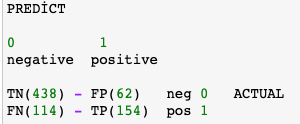

In [154]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



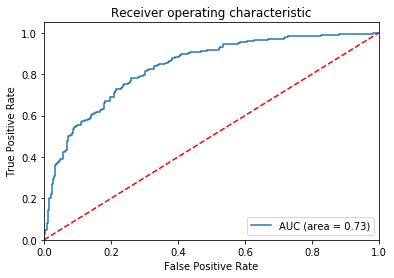

In [155]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [156]:
#yaklasim.
#mutlaka mutlaka mutlaka detay sorun!!!!
#sanki bir mufettis, ust seviye yönetici, veri hangi ortamda, dengesiz veri.

# Logistic Regression

In [157]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [158]:
log_model = LogisticRegression().fit(X,y)

In [159]:
y_pred = log_model.predict(X)

In [160]:
accuracy_score(y, y_pred)

0.7760416666666666

In [161]:
cross_val_score(log_model, X, y, cv = 10).mean()

0.7682843472317156

# RF

In [162]:
rf_model = RandomForestClassifier(random_state = 12345).fit(X,y)

In [163]:
cross_val_score(rf_model, X, y, cv = 10).mean()

0.7526315789473684

In [164]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [165]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [166]:
rf_model = RandomForestClassifier(random_state = 12345)

In [167]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 12.6min finished


In [168]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 200}

In [169]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [170]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.7564764183185237

# LightGBM

In [171]:
lgbm = LGBMClassifier(random_state = 12345)

In [172]:
cross_val_score(lgbm, X, y, cv = 10).mean()

0.7330656185919344

In [173]:
#model tuning

lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [174]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   29.2s finished


In [175]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [176]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.7513157894736842

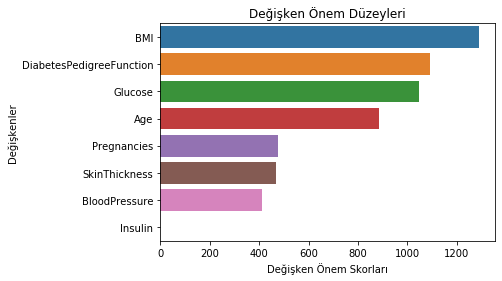

In [177]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

In [178]:
print('Log Model => ', cross_val_score(log_model, X, y, cv = 10).mean())
print('RF_Tuned => ', cross_val_score(rf_tuned, X, y, cv = 10).mean())
print('LGBM_Tuned => ', cross_val_score(lgbm_tuned, X, y, cv = 10).mean())

Log Model =>  0.7682843472317156
RF_Tuned =>  0.7630211893369789
LGBM_Tuned =>  0.7513157894736842


In [179]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []


LR: 0.768284 (0.036878)
KNN: 0.746053 (0.051627)
CART: 0.725222 (0.066052)
RF: 0.751282 (0.054249)
SVM: 0.651059 (0.003418)
XGB: 0.765636 (0.046875)
LightGBM: 0.733066 (0.029884)


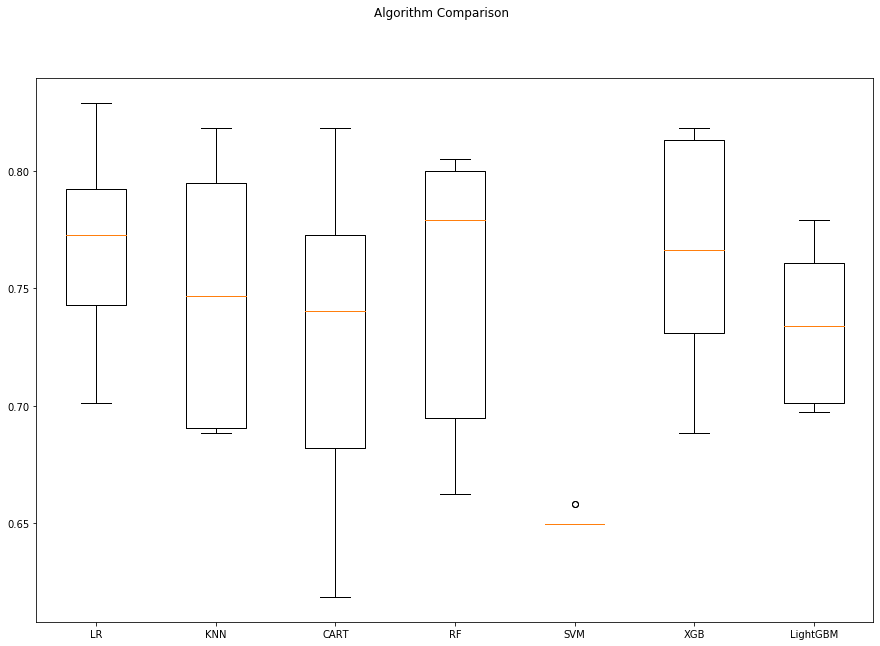

In [180]:

for name, model in models:
    
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [181]:
#ikinci yol

LR: 0.765600 (0.068951)
KNN: 0.747805 (0.051824)
CART: 0.739424 (0.031687)
RF: 0.767266 (0.050772)
SVM: 0.650132 (0.081100)
XGB: 0.763961 (0.035926)
LightGBM: 0.747488 (0.040606)


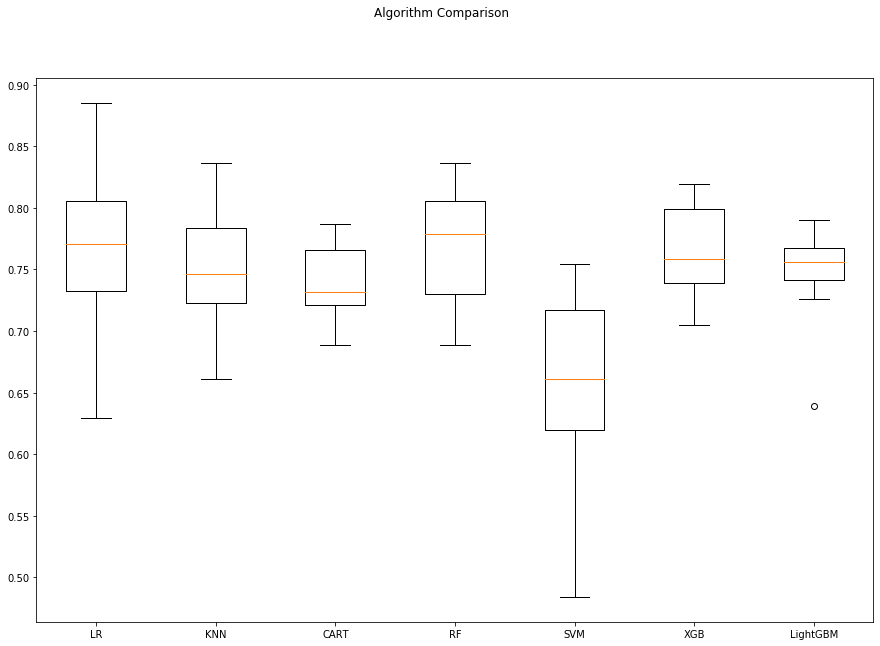

In [182]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 46)



# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 123456)
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [183]:
"""
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, acc)
        print(msg)
        
"""

'\nfor name, model in models:\n        model.fit(X_train, y_train)\n        y_pred = model.predict(X_test)\n        acc = accuracy_score(y_test, y_pred)\n        msg = "%s: (%f)" % (name, acc)\n        print(msg)\n        \n'

# Raporlama CRISP-DM
## Veriyi Anlama
## Veri Ön İşleme
## Feature engineering
## Base Modellerin Sonuçları
## Optimize Edilmiş Modeller (feat. eng, veri ön işleme, hiperparametre optimizasyonu)